Processed and saved: Processed/445204218_862107069283286_7366488337361330536_n.jpg
Processed and saved: Processed/52100241677_2ba756a7fd_b.jpg
Processed and saved: Processed/riegl1.jpg
Processed and saved: Processed/images.jpeg
Processed and saved: Processed/fea-nasa-lunabotics.jpg
Processed and saved: Processed/52130731577_59d8702f7a_b.jpg
Processed and saved: Processed/GN3zMm6WcAAztBu.jpeg
Processed and saved: Processed/349587917_1156911965702583_3613484247482749819_n.jpg
Processed and saved: Processed/349178141_6052006498261410_5768358718441825179_n.jpg
Processed and saved: Processed/GN3zMm8W8AE9_gZ.jpeg
Processed and saved: Processed/349693363_1697577333994453_4837614382100319016_n.jpg
Processed and saved: Processed/GN3zMnOXkAA3Kct.jpeg
Processed and saved: Processed/441540917_862107135949946_276876335388014190_n.jpg
Processed and saved: Processed/279414227_10159864727969183_3687371137980868393_n.jpg
Processed and saved: Processed/fea-nasa-lunabotics-2024-IMG_8998-2-1920x1152.jpg
P

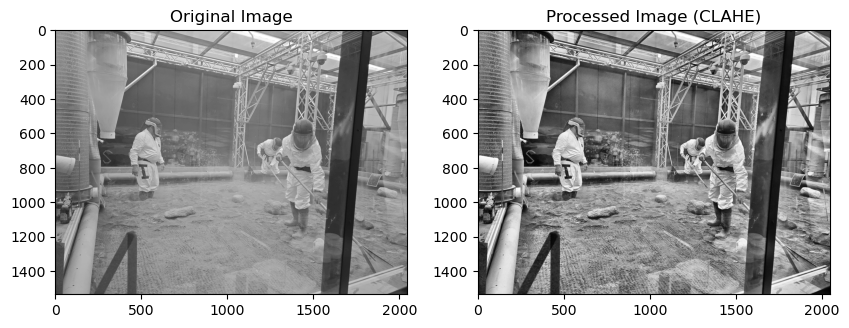

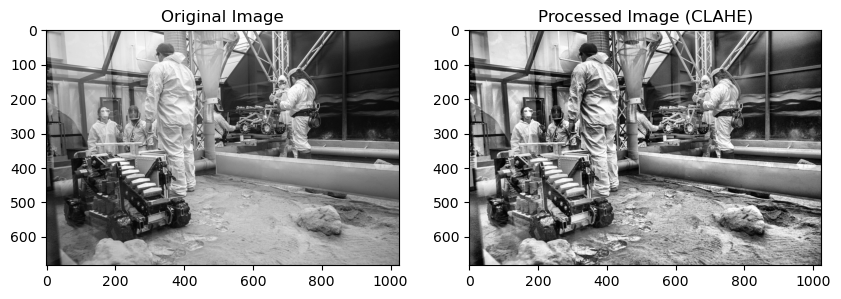

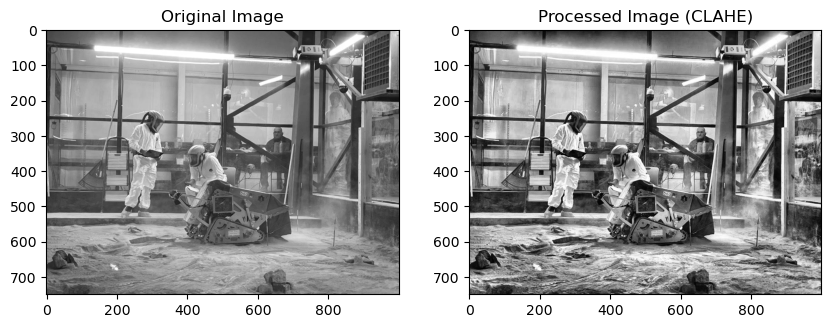

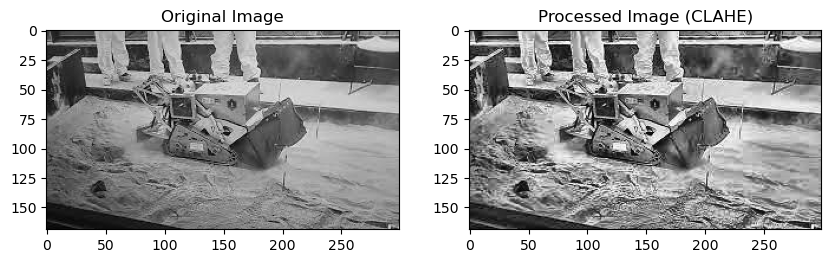

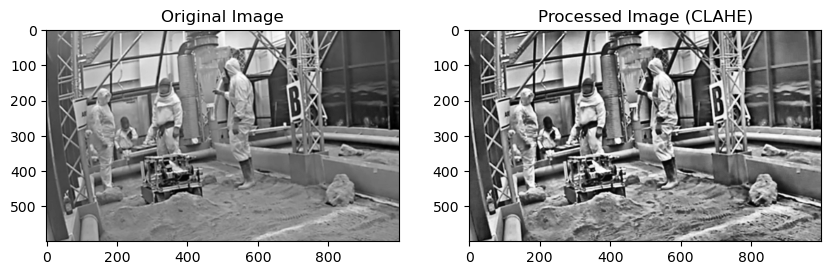

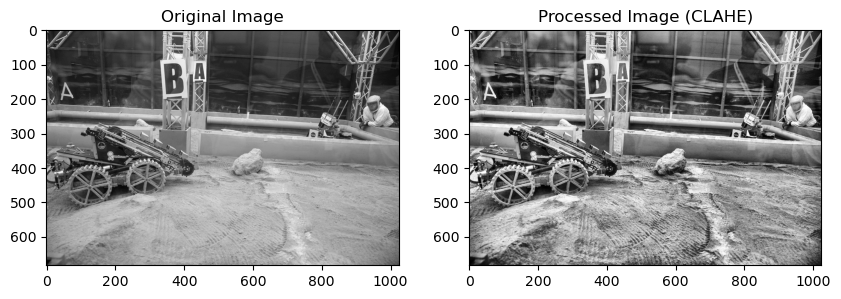

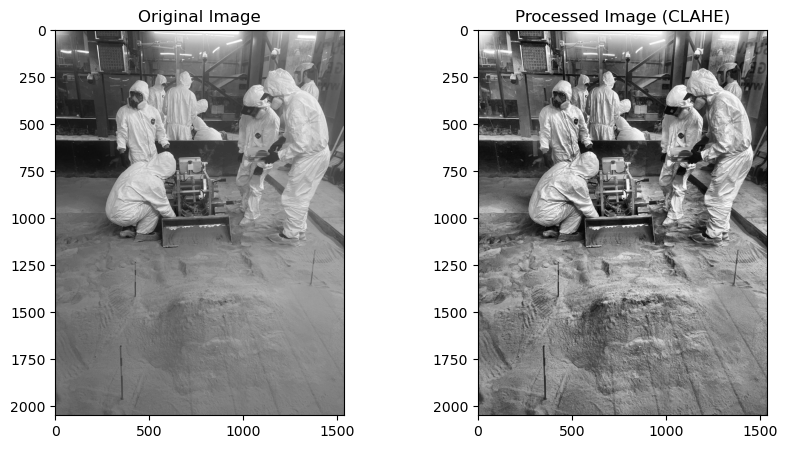

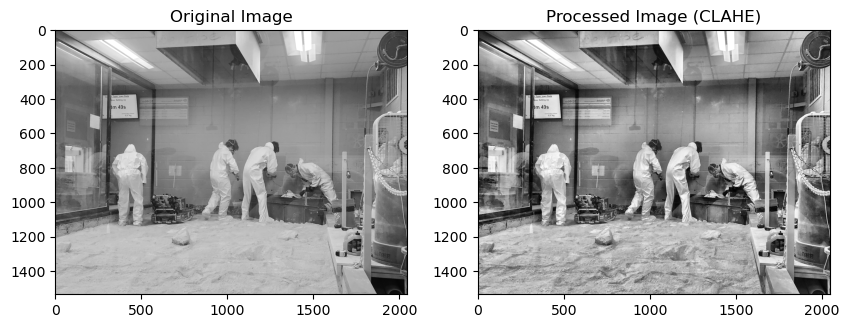

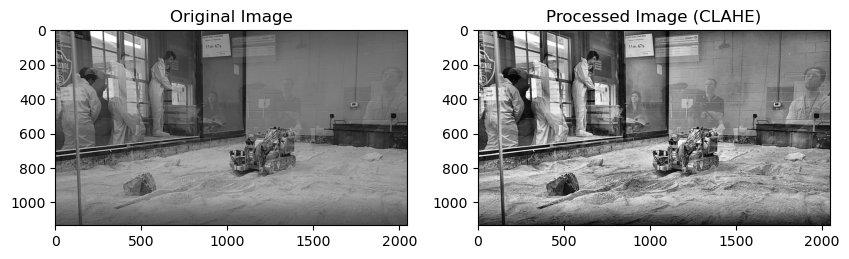

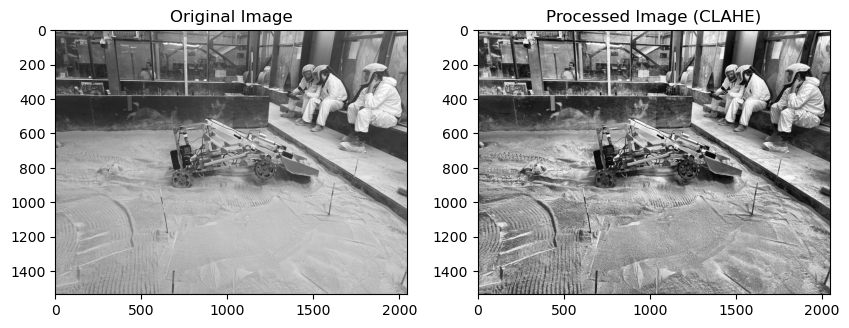

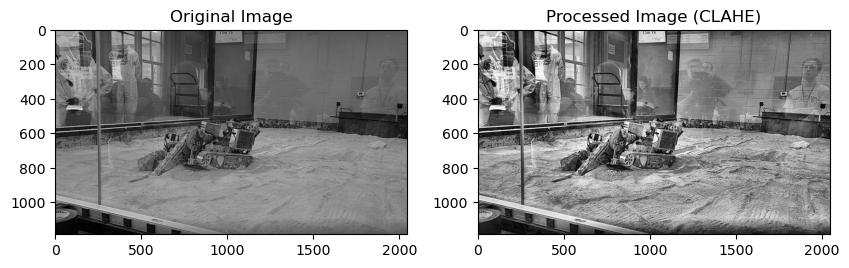

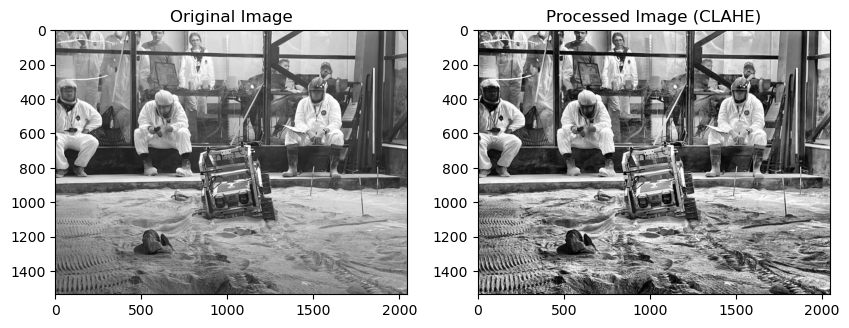

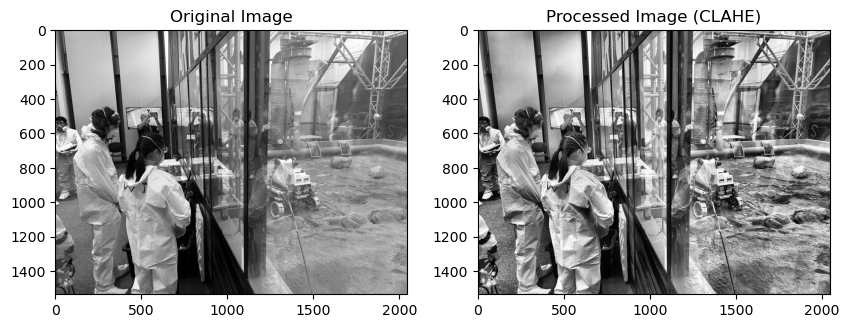

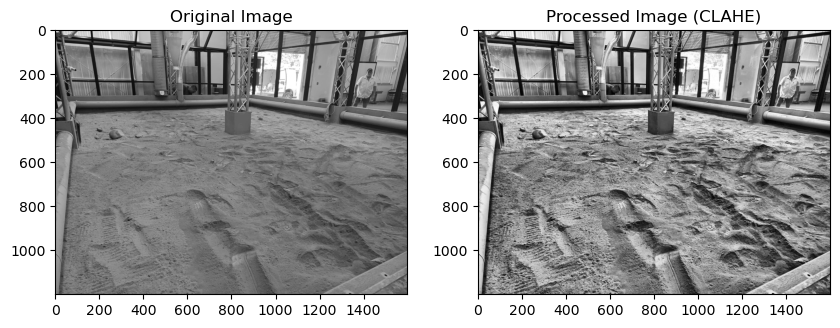

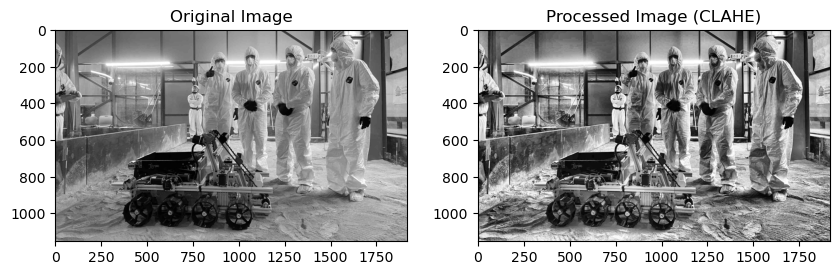

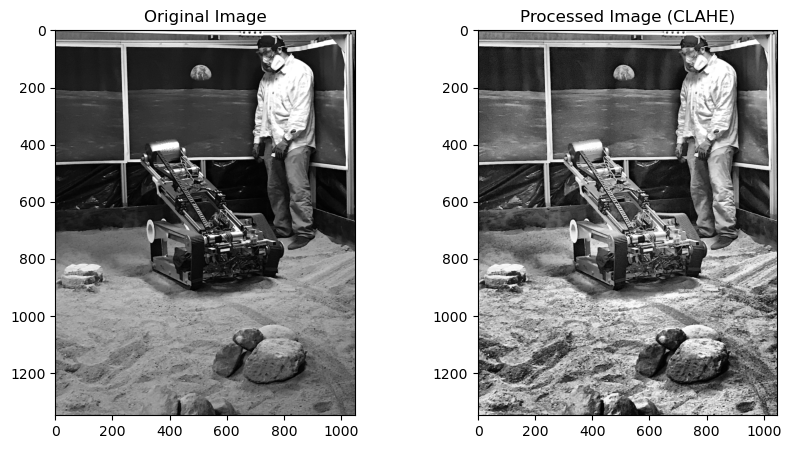

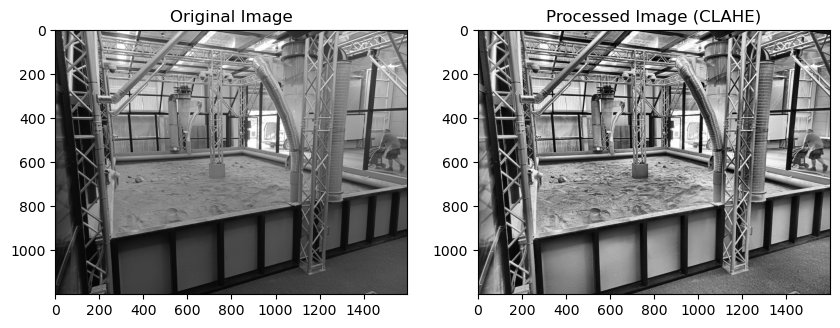

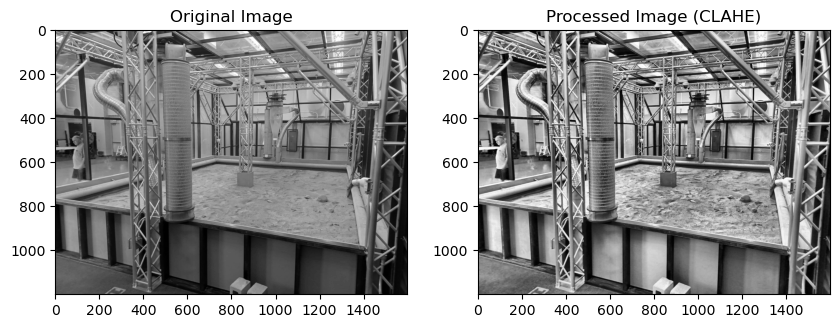

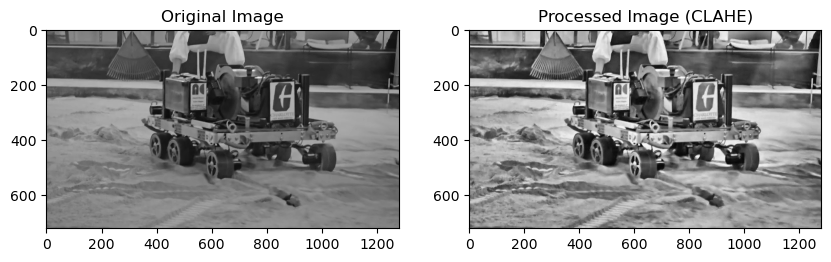

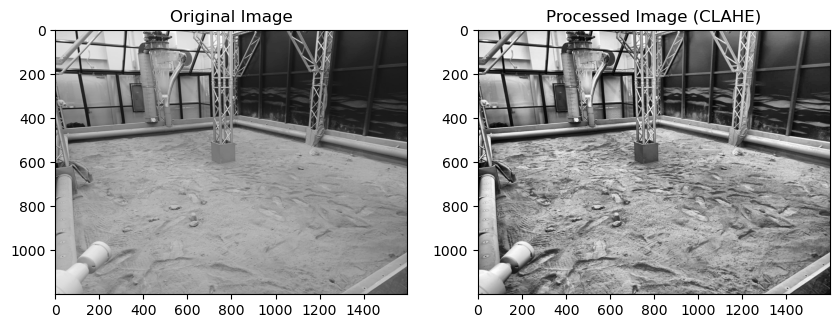

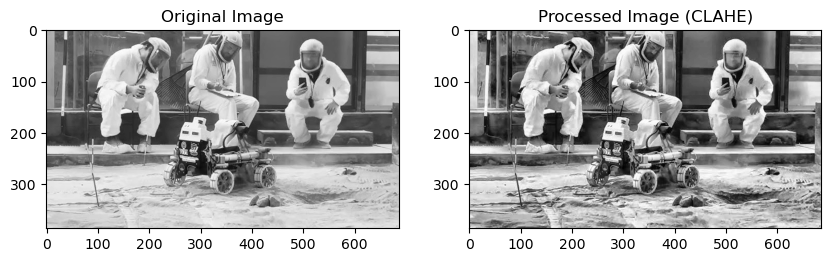

In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Set paths
input_dir = "../Data/TestBatch1"
output_dir = "../Data/processed"
os.makedirs(output_dir, exist_ok=True)

def enhance_image(image):
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply CLAHE to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(gray)
    
    # Step 3: Apply High-Pass Filtering for sharpening
    kernel = np.array([[-1, -1, -1], 
                       [-1,  9, -1],
                       [-1, -1, -1]])
    high_pass = cv2.filter2D(contrast_enhanced, -1, kernel)
    
    # Step 4: Apply Edge Detection using Canny
    edges = cv2.Canny(high_pass, threshold1=50, threshold2=150)
    
    # Optional: Combine original with edges for a blended effect
    combined = cv2.addWeighted(contrast_enhanced, 0.7, edges, 0.3, 0)
    
    # Return the processed image
    return combined

def process_and_save_images(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)
            
            # Enhance the image
            enhanced_image = enhance_image(image)
            
            # Save the processed image
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, enhanced_image)
            
            # Display the original and processed images side by side
            plt.figure(figsize=(10,5))
            plt.subplot(1, 2, 1)
            plt.title("Original")
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis("off")
            
            plt.subplot(1, 2, 2)
            plt.title("Enhanced")
            plt.imshow(enhanced_image, cmap="gray")
            plt.axis("off")
            
            plt.show()

# Process and save images
process_and_save_images(input_dir, output_dir)